<pre>

1.Implementing Classification Algorithms:
Design and implement decision tree, SVM, and k-NN classifiers. 
Evaluate their performance using confusion matrices, ROC curves, and other metrics on a dataset of your choice.

</pre>

### KNN (K - nearest neighbour algorithm )

In [23]:
# installation of required libraries
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [15]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [16]:
# creating a dataset
'''
creating 500 samples and 4 clusters
'''
x,y = make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1.5,random_state=4)

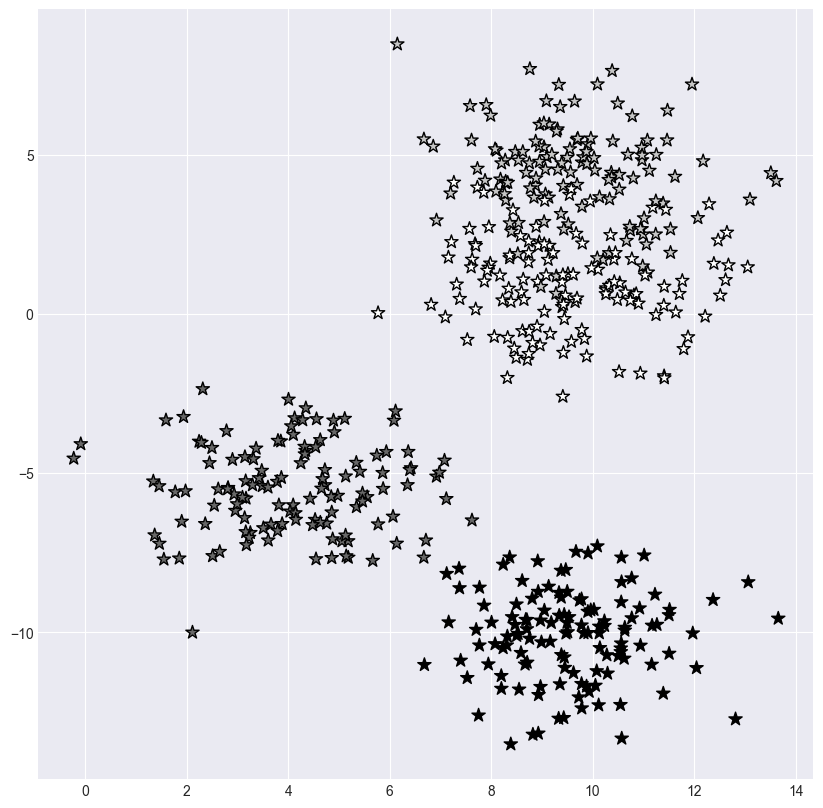

In [20]:
# visualizing datasets
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=y,marker='*',s=100,edgecolors='black')
plt.show()

In [19]:
# checking available styles
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [27]:
# splitting dataset into training and testing datasets (default split: 75% training, 25% for testing) 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [32]:
# implementing KNN classifier

knn5 = KNeighborsClassifier(n_neighbors=5)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn3 = KNeighborsClassifier(n_neighbors=3)

knn5.fit(x_train,y_train)
knn1.fit(x_train,y_train)
knn3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
# predictions

y_predict_knn5 = knn5.predict(x_test)
y_predict_knn1 = knn1.predict(x_test)
y_predict_knn3 = knn3.predict(x_test)

In [34]:
# accuracy calculation
from sklearn.metrics import accuracy_score

print("Accuracy for KNN 5 :", accuracy_score(y_test,y_predict_knn5)*100)

print("Accuracy for KNN 1 :", accuracy_score(y_test,y_predict_knn1)*100)

print("Accuracy for KNN 3 :", accuracy_score(y_test,y_predict_knn3)*100)

Accuracy for KNN 5 : 93.60000000000001
Accuracy for KNN 1 : 90.4
Accuracy for KNN 3 : 92.80000000000001


Confusion Matrix for KNN (5 neighbors):
[[27  4  0  0]
 [ 4 23  0  0]
 [ 0  0 32  0]
 [ 0  0  0 35]]


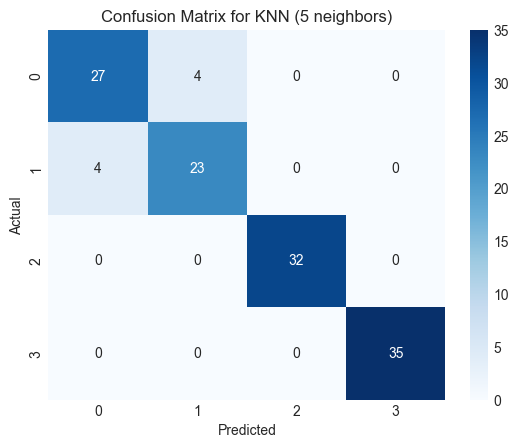

In [36]:
#confusion matrix
from sklearn.metrics import confusion_matrix


# Confusion Matrix for KNN with 5 neighbors
cm_knn5 = confusion_matrix(y_test, y_predict_knn5)
print("Confusion Matrix for KNN (5 neighbors):")
print(cm_knn5)

sns.heatmap(cm_knn5, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for KNN (5 neighbors)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [38]:
# classification report
from sklearn.metrics import  classification_report

print("Classification Report for KNN (5 neighbors):")
print(classification_report(y_test, y_predict_knn5))



Classification Report for KNN (5 neighbors):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.85      0.85      0.85        27
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        35

    accuracy                           0.94       125
   macro avg       0.93      0.93      0.93       125
weighted avg       0.94      0.94      0.94       125



In [39]:
print("Classification Report for KNN (1 neighbors):")
print(classification_report(y_test, y_predict_knn1))


Classification Report for KNN (1 neighbors):
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        31
           1       0.73      0.89      0.80        27
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        35

    accuracy                           0.90       125
   macro avg       0.90      0.90      0.90       125
weighted avg       0.91      0.90      0.90       125



In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_predict_knn5, average='weighted')
recall = recall_score(y_test, y_predict_knn5, average='weighted')
f1 = f1_score(y_test, y_predict_knn5, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.94
Recall: 0.94
F1 Score: 0.94
